In [175]:
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import matplotlib.pyplot as plt

data = pd.read_excel('database_titanic.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [176]:
data = data.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'],axis=1)
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [177]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


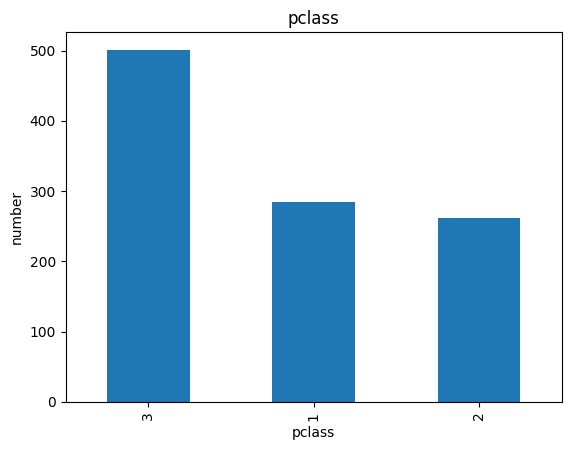

In [178]:
# créé un databis avec quand on a pas de valeur on mets la valeur de la colonne au dessus
data_bis = data.ffill()
data = data.dropna()
data['pclass'].value_counts().plot(kind='bar')
plt.title('pclass')
plt.ylabel('number')
plt.show()

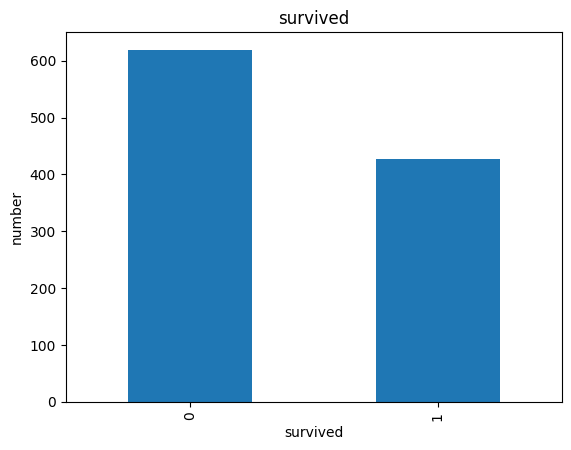

In [179]:
data['survived'].value_counts().plot(kind='bar')
plt.title('survived')
plt.ylabel('number')
plt.show()

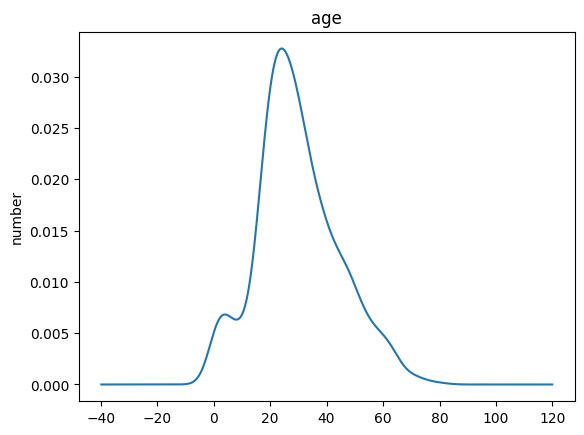

In [180]:
data['age'].plot(kind='kde')
plt.title('age')
plt.ylabel('number')
plt.show()


In [181]:
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [182]:
data[data['age'] < 18]['survived'].value_counts()

survived
1    81
0    73
Name: count, dtype: int64

In [183]:
data[data['age'] < 18].groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [184]:
data.loc[0:10,['age','sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female
3,30.0000,male
4,25.0000,female
5,48.0000,male
6,63.0000,female
7,39.0000,male
8,53.0000,female
9,71.0000,male


In [185]:
# meme chose que loc mais avec les index
data.iloc[0:10,[3,2]]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female
3,30.0000,male
4,25.0000,female
5,48.0000,male
6,63.0000,female
7,39.0000,male
8,53.0000,female
9,71.0000,male


In [186]:
from sklearn.linear_model import LogisticRegression

data_bis.replace(['male','female'],[0,1],inplace=True)
X = data_bis.drop(['survived'],axis=1) # on enleve la colonne survived
y = data_bis['survived'] # pour la mettre en resultat

model = LogisticRegression() # on créé le model
model.fit(X,y) # on entraine le model
model.score(X,y) # on regarde la précision du model

# maintenant on va faire une prédiction sur un nouveau passager qui est un homme de 21 ans en 1ere classe

# Nouveau passager : Homme de 21 ans en 1ère classe
nouveau_passager = pd.DataFrame([[2, 0, 21]], columns=['pclass', 'sex', 'age'])

# Prédiction avec le modèle entraîné
prediction = model.predict(nouveau_passager)

# Affichage du résultat
if prediction[0] == 1:
    print("Le nouveau passager survivrait.")
else:
    print("Le nouveau passager ne survivrait pas.")

Le nouveau passager ne survivrait pas.
